<center>
Predicting-subscribers-for-marketing-dataset

</center>
---



## Data Set Used

 https://archive.ics.uci.edu/ml/datasets/bank+marketing




### Task 1 (Data Preprocessing)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form.

1.Find all features that have continuous numeric values and normalize them . List those features here.

2.Find all categorical features and process them as was discussed in class. List those features and explain what you did.

3.Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.

Write your text-based answers here.


1.   Answer for bullet one
Answer : Features with continuous numeric variables are - Age, Balance, Day,Duration,Campaign,pdays,previous.
2.   Answer for bullet two
Answer :  Categorical features : job,marital,education,default, housing,loan,contact, month,poutcome. Categorical  data  are variables that contain label values rather than numeric values. It is required to perform one hot encoding on categorical feature so that it is converted into numerical form as many machine learning algorithms can not operate on labels directly.
3.   Answer for bullet three
Answer : Yeah some features contained "unknown" in their missing values and other feature(e.g - pdays) contained erratic values. I will handle them through one hot-encoding in case of categorical data and by elimination of the features(with a lot of missing or erroreneous values in case of continuous numeric. If a few values are missing in a numeric feature, then those missing values can be replced by mean value of the feature. In case of categorical data, the missing values can be replaced by mode value of the feature. If there are missing values i.e no data is available and it is left blank in the dataset, then we can handle through isnull(), which gives us the detail of missing values.




In [217]:
# PROBLEM 1, TASK 1 CODE GOES HERE
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
#from sklearn.preprocessing import standardScalar

data_train_1 = pd.read_csv("train_1.csv")
data_valid_1=pd.read_csv("valid_1.csv")
data_train_2 = pd.read_csv("train_2.csv")
data_valid_2=pd.read_csv("valid_2.csv")
data_test =pd.read_csv("test.csv")
# print(data_train_1.shape)
# print(data_valid_1.shape)
# print(data_train_2.shape)
# print(data_valid_2.shape)
# print(data_test.shape)

#storing Target Variable to different a location
targetTrain1 = data_train_1['y']
targetValid1 = data_valid_1['y']
targetTrain2 = data_train_2['y']
targetValid2 = data_valid_2['y']
targetTest   = data_test['y']
data_train_1.drop("y",axis=1,inplace=True)
data_valid_1.drop("y",axis=1,inplace=True)
data_train_2.drop("y",axis=1,inplace=True)
data_valid_2.drop("y",axis=1,inplace=True)
data_test.drop("y",axis=1,inplace=True)

#Dropping a irrelevant feature with a lot of erroreneous data
data_train_1.drop("pdays",axis=1,inplace=True)
data_valid_1.drop("pdays",axis=1,inplace=True)
data_train_2.drop("pdays",axis=1,inplace=True)
data_valid_2.drop("pdays",axis=1,inplace=True)
data_test.drop("pdays",axis=1,inplace=True)


#features with continuous numeric value
data_train1 = data_train_1.select_dtypes(include=['int64'])
data_train2 = data_train_2.select_dtypes(include=['int64'])
data_valid1 = data_valid_1.select_dtypes(include=['int64'])
data_valid2 = data_valid_2.select_dtypes(include=['int64'])
data_test1 = data_test.select_dtypes(include=['int64'])
print(data_train1)

#Normalisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Ntrain1=sc.fit_transform(data_train1)
Ntrain2=sc.fit_transform(data_train2)
Nvalid1=sc.fit_transform(data_valid1)
Nvalid2=sc.fit_transform(data_valid2)
Ntest=sc.fit_transform(data_test1)
#Ntrain1
#Ntrain2
#Nvalid1
#Nvalid2

#find categorical feature
data_train1_cat = data_train_1.select_dtypes(exclude=['int64'])
data_train2_cat = data_train_2.select_dtypes(exclude=['int64'])
data_valid1_cat = data_valid_1.select_dtypes(exclude=['int64'])
data_valid2_cat = data_valid_2.select_dtypes(exclude=['int64'])
data_test_cat  =  data_test.select_dtypes(exclude=['int64'])

print(data_train1_cat)
#data_train2_cat
#data_valid1_cat
#data_valid2_cat


#processing of categorical data
xtrain1_cat=pd.get_dummies(data_train1_cat)
# print(xtrain1_cat.columns)
xtrain2_cat=pd.get_dummies(data_train2_cat)
#print(xtrain2_cat)
xvalid1_cat=pd.get_dummies(data_valid1_cat)
#print(xvalid1_cat)
xvalid2_cat=pd.get_dummies(data_valid2_cat)
# print(xvalid2_cat)
xtest_cat=pd.get_dummies(data_test_cat)
# print(xtest_cat)

# concatinating features with numeric feature(normalised) with processed categorical data
Ntrain1 = pd.concat([pd.DataFrame(Ntrain1),xtrain1_cat], axis=1)
Ntrain2 = pd.concat([pd.DataFrame(Ntrain2),xtrain2_cat], axis=1)
Nvalid1 = pd.concat([pd.DataFrame(Nvalid1),xvalid1_cat], axis=1)
Nvalid2 = pd.concat([pd.DataFrame(Nvalid2),xvalid2_cat], axis=1)
Ntest = pd.concat([pd.DataFrame(Ntest),xtest_cat], axis=1)

#Are there any features which have missing values
print(data_train_1.isnull().sum())
data_train_2.isnull().sum()
data_valid_1.isnull().sum()
data_valid_2.isnull().sum()


# preparation of Target variable
y_train1=pd.get_dummies(targetTrain1)
y_train2=pd.get_dummies(targetTrain2)
y_valid1=pd.get_dummies(targetValid1)
y_valid2=pd.get_dummies(targetValid2)
y_test  =pd.get_dummies(targetTest)

y_train1.drop("no",axis=1,inplace=True)
y_train2.drop("no",axis=1,inplace=True)
y_valid1.drop("no",axis=1,inplace=True)
y_valid2.drop("no",axis=1,inplace=True)
y_test.drop("no",axis=1,inplace=True)



print(Ntrain1.shape)
print(y_valid1.shape)
print(Ntrain2.shape)
print(y_valid2.shape)


      age  balance  day  duration  campaign  previous
0      58        0    2       478         2         0
1      47     -216    6       197         1         3
2      31       59    6      1347         2         1
3      60      824    9       265         1         8
4      42      -91    5        43         1         0
5      59       57   22       212        11         0
6      62        6   13       216         1         4
7      44       67    6       220         2         0
8      53      173    1       157         1         0
9      49      914    4       185         1         0
10     37      549    2       239         1         0
11     51     1435   11       587         1         0
12     53      587   19       561         1         0
13     43     3064   20      2453         2         0
14     38      797   11       124         4         0
15     38     2350   30       101         2         0
16     33        5    7        12         1         0
17     28       16    5     

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
dtype: int64
(6769, 50)
(1693, 1)
(28934, 50)
(7234, 1)


### Task 2 (Model $\mathcal{A}$) 

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

value of maximum Accuracy:  0.816302
value of lambda for maximum accuracy:0.010200
Maximum Accuracy_test :0.751078


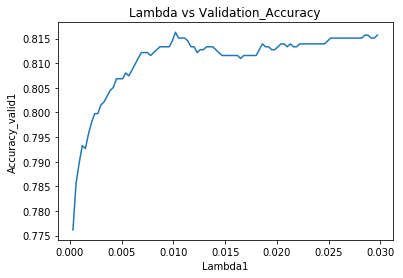

In [206]:
# PROBLEM 1, TASK 2 CODE GOES HERE
#Training the model
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
Lambda1=[]
Accuracy_valid1=[]
Lambda_test1=[]
Accuracy_test1=[]
for i in range(1,100):
    
    lam = (0.0003*(i))
    logmodel=LogisticRegression("l2",C=lam)
    logmodel.fit(Ntrain1,y_train1)
    
    predictedX = logmodel.predict(Nvalid1)
    

    
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_valid1,predictedX)
    Lambda1.append(lam)
    Accuracy_valid1.append(acc)
    
    #Testing_accuracy_score for test
    predictedX_test1 = logmodel.predict(Ntest)
    accuracy_test = accuracy_score(y_test, predictedX_test1)
    Lambda_test1.append(lam)
    Accuracy_test1.append(accuracy_test)


k1=max(Accuracy_valid1)
print("value of maximum Accuracy:%10f"% k1)
print("value of lambda for maximum accuracy:%5f"% Lambda1[(Accuracy_valid1.index(k1))])
plt.ylabel('Accuracy_valid1')
plt.xlabel('Lambda1')
plt.plot(Lambda1,Accuracy_valid1)
plt.title("Lambda vs Validation_Accuracy")
print("Maximum Accuracy_test :%5f"%max(Accuracy_test1))

### Task 3 (Model $\mathcal{B}$) 
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

value of maximum Validation Accuracy:  0.900608
value of lambda for maximum accuracy:0.039000
Maximum Accuracy_test_data :0.901139


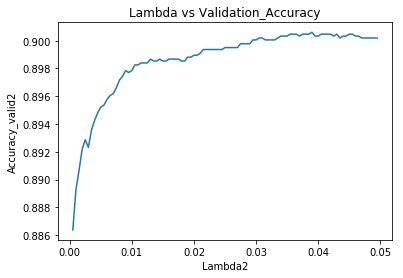

In [207]:
# PROBLEM 1, TASK 3 CODE GOES HERE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
Lambda2=[]
Accuracy_valid2=[]
Lambda_test2=[]
Accuracy_test2=[]

for ccc in range(1,100):
    
    lam1 = (0.0005*(ccc))
    logmodel1=LogisticRegression("l2",C=lam1)
    logmodel1.fit(Ntrain2,y_train2)
    
    predictedX_valid2 = logmodel1.predict(Nvalid2)
    
    from sklearn.metrics import classification_report
    classification_report(y_valid2,predictedX_valid2)
    from sklearn.metrics import confusion_matrix
    #print(confusion_matrix(y_valid2,predictedX_valid2))
    
    #validation_accuracy_score
    from sklearn.metrics import accuracy_score
    acc2 = accuracy_score(y_valid2,predictedX_valid2)
    Lambda2.append(lam1)
    Accuracy_valid2.append(acc2)
    
    #Testing_accuracy_score for test
    predictedX_test = logmodel1.predict(Ntest)
    accuracy_test = accuracy_score(y_test, predictedX_test)
    Lambda_test2.append(lam1)
    Accuracy_test2.append(accuracy_test)

k=max(Accuracy_valid2)
print("value of maximum Validation Accuracy:%10f"% k)
print("value of lambda for maximum accuracy:%5f"% Lambda2[(Accuracy_valid2.index(k))])
plt.ylabel('Accuracy_valid2')
plt.xlabel('Lambda2')
plt.plot(Lambda2,Accuracy_valid2)
plt.title("Lambda vs Validation_Accuracy")
print("Maximum Accuracy_test_data :%5f"%max(Accuracy_test2))

### Task 4 (Model $\mathcal{C}$)

let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

value of maximum Accuracy:  0.900885
value of lambda for maximum accuracy:0.128000
value of threshold for maximum accuracy:0.510000


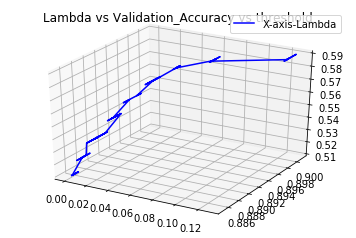

In [208]:
# PROBLEM 1, TASK 4 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
Lambda3=[]
Accuracy_valid3=[]
ThresholdList = []


maxa = optLam = optThresh = 0
threshold = 0.5
for thresh in range(1,10):
    for reg in range(1,10):
        lam3 = 0.0005*2**(reg-1)
        threshold = 0.5+ 0.01*thresh
        logmodel2=LogisticRegression("l2",C=lam3)
        logmodel2.fit(Ntrain2,y_train2)
        
        predictedX_valid3_orig = logmodel2.predict(Nvalid2)
        predictedX_valid3_ = logmodel2.predict_proba(Nvalid2)[:,1]
        predictedX_valid3 = np.copy(predictedX_valid3_)
        predictedX_valid3[predictedX_valid3_<threshold] = 0
        predictedX_valid3[predictedX_valid3!=0] = 1
        # predictedX_valid3 = predictedX_valid3.reshape(predictedX_valid3.shape[0])
        
        #validation_accuracy_score
        from sklearn.metrics import accuracy_score
        acc3 = accuracy_score(np.array(y_valid2).reshape(y_valid2.shape[0]),predictedX_valid3)
        Lambda3.append(lam3)
        Accuracy_valid3.append(acc3)
        ThresholdList.append(threshold)
        #print(lam3, threshold, acc3)
        if(maxa<acc3):
            maxa = acc3
            optLam = lam3
            optThresh = threshold
            
        

predictedX_valid3_orig = logmodel2.predict(Nvalid2)

Accuracy_valid3 = np.array(Accuracy_valid3)
sorted_accuracy=Accuracy_valid3[np.argsort(Lambda3)]
sorted_Lambda3=np.sort(Lambda3)

k3=max(Accuracy_valid3)
print("value of maximum Accuracy:%10f"% k3)
print("value of lambda for maximum accuracy:%5f"% optLam)
print("value of threshold for maximum accuracy:%5f"% optThresh)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#plt.zlabel('threshold')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Axes3D.plot3D(ax,xs=sorted_Lambda3,ys=sorted_accuracy,zs=ThresholdList,color="b",label="X-axis-Lambda")
#plt.plot(sorted_Lambda3,sorted_accuracy,"b")
plt.title("Lambda vs Validation_Accuracy vs threshold")
plt.legend()




In [209]:
#Test_accuracy_score

Lambda4_test3=[]
Accuracy4_test3=[]
maxa1 = optLam1 = optThresh1 = 0
threshold1 = 0.5
for thresh1 in range(1,50):
    for reg1 in range(1,50):
        lam4 = 0.00005*2**(reg1-1)
        threshold1 = 0.5+ 0.01*thresh1
        logmodel2=LogisticRegression("l2",C=lam3)
        logmodel2.fit(Ntrain2,y_train2)
        
        predictedX_test4_orig = logmodel2.predict(Ntest)
        predictedX_test4_ = logmodel2.predict_proba(Ntest)[:,1]
        predictedX_test4 = np.copy(predictedX_test4_)
        predictedX_test4[predictedX_test4_<threshold1] = 0
        predictedX_test4[predictedX_test4!=0] = 1
        
       
        
        from sklearn.metrics import accuracy_score
        acc4 = accuracy_score(np.array(y_test).reshape(y_test.shape[0]),predictedX_test4)
        Lambda4_test3.append(lam4)
        Accuracy4_test3.append(acc4)
        #print(lam4, threshold1, acc4)
        if(maxa1<acc4):
            maxa1 = acc4
            optLam1 = lam4
            optThresh1 = threshold1
p=max(Accuracy4_test3)
print("value of maximum Accuracy for test:%10f"% p)
print("value of lambda for maximum accuracy for test:%5f"% optLam1)
print("value of threshold for maximum accuracy for test:%5f"% optThresh1)
            
        

value of maximum Accuracy for test:  0.900918
value of lambda for maximum accuracy for test:0.000050
value of threshold for maximum accuracy for test:0.510000


### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.

Answer: The detailed report on performance of Models has been shown below. The training dataset 2 has more training data than that of training set 1,this may be the reason of good accuarcy of model B  For model"A", training set1 contains more noise and outliers as compared to training set2 used for model B and model C, due to which accuracy in case of model "B" & model "C" is more than that of model "A".As Validation set1 used for model A is small as compared to validation set2 used in model B & model C, there is a possibilty of better tuning of hyperparameter in case of model B & C as compared to model A, as while validation hyperparameter(e.g Lambda in case of regularisation) is tuned to get more reliable model. 

2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

Answer: I think the metric used to find the best hyperparameter is a good metric, as validation accuarcy and testing accuracy is  90% in model B and C, which seems to good enough to rely upon metric. 



In [210]:
1.#Report on the performance of model A
#Validation Accuracy Report of model A
print("Report on the performance of model A")
print("Validation Accuracy Report of model A")
from sklearn.metrics import classification_report
print("value of maximum Accuracy for model A:%10f"% k1)
print("classification_report for model A for validation_data1:")
print(classification_report(y_valid1,predictedX))
from sklearn.metrics import confusion_matrix
M=confusion_matrix(y_valid1,predictedX)
print("confusion_matrix for model A for validation_data1 :")
print(M)

#Test Accuracy report of model A
print("Test Accuracy Report of model A")
from sklearn.metrics import classification_report
print("Maximum Accuracy_test :%5f"%max(Accuracy_test1))
print("classification_report for model A for test_data:")
print(classification_report(y_test, predictedX_test))
from sklearn.metrics import confusion_matrix
M_test=confusion_matrix(y_test, predictedX_test1)
print("confusion_matrix for model A for test_data :")
print(M_test)



#Report on the performance of model B
#validation Accuracy Report
print("validation Accuracy Report of model B")
print("value of maximum Accuracy for model B:%10f"% k)
from sklearn.metrics import classification_report
print("classification_report for model B for validation_data2:")
print(classification_report(y_valid2,predictedX_valid2))
from sklearn.metrics import confusion_matrix
M1=confusion_matrix(y_valid2,predictedX_valid2)
print("confusion matrix for model B for validation data set")
print(M1)

#Test Accuracy report of model B
print("Test Accuracy Report of model B")
from sklearn.metrics import classification_report
print("Maximum Accuracy_test :%5f"%max(Accuracy_test2))
print("classification_report for model B for test_data:")
print(classification_report(y_test, predictedX_test))
from sklearn.metrics import confusion_matrix
M1_test=confusion_matrix(y_test, predictedX_test)
print("confusion_matrix for model B for test_data :")
print(M1_test)


#Report on the performance of model C
#validation Accuracy Report
print("validation Accuracy Report of model C")
print("value of maximum Accuracy for model B:%10f"% k3)
from sklearn.metrics import classification_report
print(classification_report(y_valid2,predictedX_valid3))
from sklearn.metrics import confusion_matrix
M2=confusion_matrix(y_valid2,predictedX_valid3)
print("confusion matrix for model C for validation data set")
print(M2)

#Test Accuracy report of model C
print("Test Accuracy Report of model C")
from sklearn.metrics import classification_report
print("Maximum Accuracy_test :%5f"% p)
print("classification_report for model C for test_data:")
print(classification_report(y_test, predictedX_test4))
from sklearn.metrics import confusion_matrix
M4_test=confusion_matrix(y_test, predictedX_test4)
print("confusion_matrix for model C for test_data :")
print(M4_test)




Report on the performance of model A
Validation Accuracy Report of model A
value of maximum Accuracy for model A:  0.816302
classification_report for model A for validation_data1:
             precision    recall  f1-score   support

          0       0.81      0.83      0.82       847
          1       0.83      0.80      0.81       846

avg / total       0.82      0.82      0.82      1693

confusion_matrix for model A for validation_data1 :
[[704 143]
 [169 677]]
Test Accuracy Report of model A
Maximum Accuracy_test :0.751078
classification_report for model A for test_data:
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7985
          1       0.65      0.34      0.44      1058

avg / total       0.89      0.90      0.89      9043

confusion_matrix for model A for test_data :
[[5818 2167]
 [  84  974]]
validation Accuracy Report of model B
value of maximum Accuracy for model B:  0.900608
classification_report for model B for valid